In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB47_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB47.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.003984
1,0.002903,0.003984
2,0.005805,0.053785
3,0.008708,0.153386
4,0.011611,0.153386
...,...,...
289,0.986938,0.003984
290,0.989841,0.003984
291,0.993470,0.003984
292,0.996372,0.003984


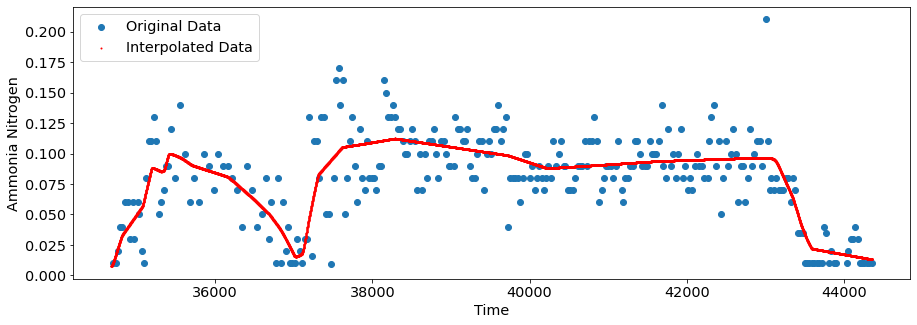

313/313 [==============================] - 0s 362us/step - loss: 4.0443e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0092
AN_max = 0.21
time_min = 34710.00        
time_max = 44356.38        

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078682378
,0.084798663
,0.09112228
,0.097445897
,0.103769513
,0.11009313
,0.116520413
,0.122636698
,0.128960314
,0.135283931
,0.141607548
,0.147931164
,0.154358447
,0.160474732
,0.166798349
,0.173121965
,0.179445582
,0.185769199
,0.192196481
,0.198416432
,0.211063666
,0.955695448
,0.958805424
,0.962019065
])
interpolation

array([[0.4479565 ],
       [0.44033408],
       [0.43026394],
       [0.41713232],
       [0.40419906],
       [0.39786816],
       [0.39143336],
       [0.38531002],
       [0.37905833],
       [0.3728068 ],
       [0.36649668],
       [0.35999992],
       [0.34752887],
       [0.3318885 ],
       [0.31456506],
       [0.29740724],
       [0.28024375],
       [0.2630803 ],
       [0.24386431],
       [0.22492051],
       [0.1805339 ],
       [0.04451147],
       [0.04278798],
       [0.04100705]], dtype=float32)